## Lab 8.  Why The Mean Matters in School Life. 

Welcome to Lab 8! In this lab you will practice calculating variance, calculating standard deviation, and converting values to standard units. You will use these skills to compare grades in a course and you will use Chebyshev’s bounds to predict how hard the students should work in order to rank in the top 5% of the class. Finally, you will use confidence intervals to help college administrators plan for next quarter by predicting the enrollement in a new course.


Reading:
* [Chapter 12.2](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/12/2/variability.html): variabilty, standard deviation, standard units, Chebyshev bounds.
* [Chapter 12.3](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/12/3/sd-and-the-normal-curve.html): Normal Curve
* [Chapter 12.4](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/12/4/central-limit-theorem.html): The Central Limit Theorem
* [Chapter 12.5](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/12/5/variability-of-the-sample-mean.html): The Variability of the Sample Mean


As usual, **run the cell** below to prepare the lab and the automatic tests.

In [7]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab08.ok')
_ = ok.auth(inline=True)

Assignment: Why The Mean Matters
OK, version v1.12.8

Successfully logged in as wcarlson@ucsd.edu


### 0. Comparing Grades Using Standard Units. 

Two of your friends, Cathy and Sam, just took their midterms. Cathy took her circuits design midterm and Sam took his Spanish vocabulary midterm. Cathy received a **B+** on her midterm (87%) and Sam received an **A-** (92%). Cathy claims that while she recieved a lower grade on her midterm, she actually did better (relative to the rest of the class) than Sam. Sam disagrees. Knowing that you are taking DSC10, your two friends come to you to settle their argument. 


They show you two tables: `circuits_midterm` and `spanish_midterm` that represent the grades for their classes. Both exams are out of 100 points. 

Cathy's Score: 87
Sam's Score: 92


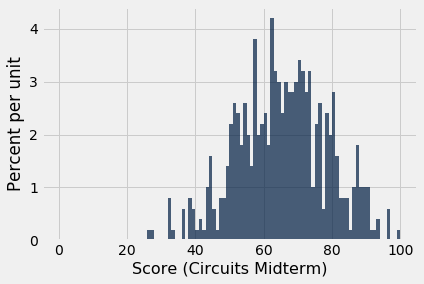

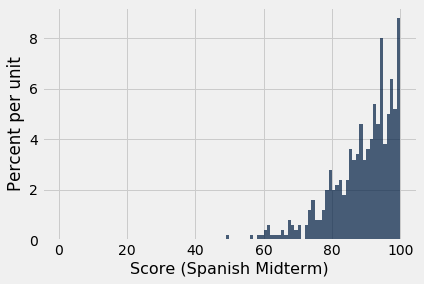

In [8]:
# Cathy's histogram
circuits_midterm = Table.read_table("circuits_midterm.csv")
circuits_midterm.hist('Score (Circuits Midterm)', bins=range(0,101,1))
cathy_score = 87
print("Cathy's Score: " + str(cathy_score))

# Sam's histogram
spanish_midterm = Table.read_table("spanish_midterm.csv")
spanish_midterm.hist('Score (Spanish Midterm)', bins=range(0,101,1))
sam_score = 92
print("Sam's Score: " + str(sam_score))


You know that instead of comparing their actual scores, you should first convert their scores into **standard units**. Standard units are often represented as $\textbf{z}$.
$$ z = \frac{\mbox{value - average}}{SD}$$

To compute the midterm score in standard units for each friend, we need to:
1. Compute the **average** grade for the entire class. We will use the `np.mean` method to do this.
2. Compute the **standard deviation** (SD) of the midterm scores for the entire class. We *could* use `np.std`, but we will write our own function to do that. 

*Reminder 1*: Standard deviation is the square root of the variance.  Therefore let's make a function that computes the **variance** first. 

*Reminder 2*: Variance is the mean squared deviation from the average:

$$ variance = \frac{(value_1 - average)^2 + (value_2 - average)^2 +...+ (value_n - average)^2}{n},$$
where `n` is the number of values (exam scores for our problem).


** Question 0.1** Fill in the missing code to complete the function `compute_variance`. It takes as input an array of numbers and returns the variance as a single number. 

In [9]:
def compute_variance(data):
#     average = ... # Find the average of the data
#     diff = ...    # diff should be an array that contains the differnce between every entry in data and the average
#     square_diff = ... # square every entry of diff, the result should still be an array
#     sum_square_diff = ... # the sum of the entries of square diff
#     variance = ...    # a single value (the variance of data)
#     return variance
    average = np.mean(data)
    diff = data - average
    square_diff = diff**2
    sum_square_diff = sum(square_diff)
    variance = sum_square_diff / data.size
    return variance
 

Then use the `compute_variance` function to compute the variance of the two samples. 

In [10]:
circuits_midterm_var = compute_variance(circuits_midterm.column('Score (Circuits Midterm)'))
print("Variance of circuits midterm: " + str(circuits_midterm_var))

spanish_midterm_var = compute_variance(spanish_midterm.column('Score (Spanish Midterm)'))
print("Variance of Spanish midterm: " + str(spanish_midterm_var))

Variance of circuits midterm: 173.205296
Variance of Spanish midterm: 84.2656


In [11]:
_ = ok.grade('q0_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed




**Question 0.2** After calculating the variance, we want to write a function that calculates the standard deviation. Fill in the missing code to complete the function `compute_sd`. It takes as input an array of numbers and returns the *standard deviation* as a single number.

*Hint: * use method `compute_variance`.

In [12]:
def compute_sd(data):
#     return ...
    
    variance = compute_variance(data)
    sqrt_of_variance = np.sqrt(variance)
    return sqrt_of_variance

Then use `compute_sd` function to compute the standard deviation of the two midterms.

In [13]:
circuits_midterm_sd = compute_sd(circuits_midterm.column('Score (Circuits Midterm)'))
print("Standard Deviation of circuits midterm: " + str(circuits_midterm_sd))

spanish_midterm_sd = compute_sd(spanish_midterm.column('Score (Spanish Midterm)'))
print("Standard Deviation of Spanish midterm: " + str(spanish_midterm_sd))

Standard Deviation of circuits midterm: 13.160748307
Standard Deviation of Spanish midterm: 9.17962962216


In [14]:
_ = ok.grade('q0_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 0.3** After writing a function that calculates the standard deviation, you are equipped to write a function that converts a given score to standard units. Fill in the missing code to complete the function `compute_su`. It takes a *score*, the *average score*, and the *standard deviation* and returns the score in standard units. 

\# Warning: Be careful with order of operations

In [15]:
def compute_su(score, avg, sd):
#     standard_unit = ...
#     return standard_unit
    
    standard_unit = (score - avg) / sd
    return standard_unit

Then use `compute_su` function to transform the scores earned by each friend into standard units.

In [16]:
cathy_su = compute_su(cathy_score, np.mean(circuits_midterm.column('Score (Circuits Midterm)')), circuits_midterm_sd)
print("Standard Unit of Cathy's Score: " + str(cathy_su))

sam_su = compute_su(sam_score, np.mean(spanish_midterm.column('Score (Spanish Midterm)')), spanish_midterm_sd)
print("Standard Unit of Sam's Score: " + str(sam_su))

Standard Unit of Cathy's Score: 1.66768632665
Standard Unit of Sam's Score: 0.383457736846


In [17]:
_ = ok.grade('q0_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 0.4** Cathy's score *is* higher than Sam's score when we convert to standard units, which can be seen as evidence that she did better on her exam relative to her classmates than Sam did relative to his. 

Another way to measure their relative performances is directly from the tables `circuits_midterm` and `spanish_midterm`, by calculating, for each of Cathy and Sam, the percentage of students they scored higher than (or the same as). Comparing Cathy's percentage to Sam's percentage will give us an alternative way of measuring who did better relative to their classmates. Calculate Cathy's percentage and Sam's percentage below.



In [18]:
#cathy_percentage = ...
#print("Cathy's Percentage: " + str(cathy_percentage))

#sam_percentage = ...
#print("Sam's Percentage: " + str(sam_percentage))

cathy_percentage = 100*circuits_midterm.where('Score (Circuits Midterm)', are.not_above(cathy_score)).num_rows/circuits_midterm.num_rows
print("Cathy's Percentage: " + str(cathy_percentage))

sam_percentage = 100*spanish_midterm.where('Score (Spanish Midterm)', are.not_above(sam_score)).num_rows/spanish_midterm.num_rows
print("Sam's Percentage: " + str(sam_percentage))

Cathy's Percentage: 95.4
Sam's Percentage: 58.2


In [19]:
_ = ok.grade('q0_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 1. Chebychev's Bounds and Normal Curves

Lets look at the histograms of the two midterms again.

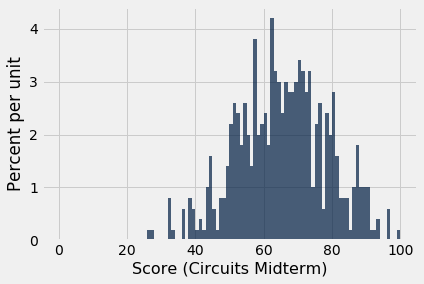

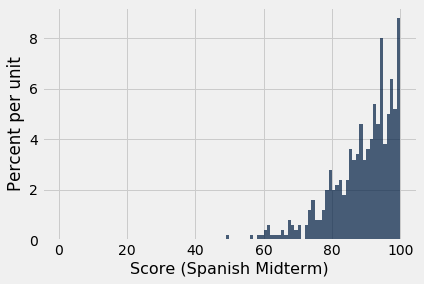

In [20]:
circuits_midterm.hist('Score (Circuits Midterm)', bins=range(0,101,1))
spanish_midterm.hist('Score (Spanish Midterm)', bins=range(0,101,1))


**Question 1.1**
Which of the two graphs is a roughly normal curve?

1. Only the upper graph (Circuits Midterm)  is normal.
2. Only the lower graph (Spanish Midterm) is normal. 
3. Both graphs are normal. 
4. Neither graph is normal.

Remember all normal curves have the following characteristics:

* The mean (average) is always in the center of a normal curve.
* A normal curve has only one mode (peak).

Set variable `q1_1` to either 1, 2, 3 or 4 depending on your answer. 

In [21]:
q1_1 = ...
q1_1 = 1

In [22]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2**
From looking at the histogram of the Spanish exam above, rank the following values in order from smallest to largest.

1. The mean score.  
2. The median score.
3. The most common score (the *mode*).

Set variable `q1_2` to a list containing the numbers 1, 2, 3 in the appropriate order.

In [23]:
q1_2 = [ ]
q1_2 = [1, 2, 3]

In [24]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Chebyshev's Bounds, recap

Chebyshev's Bounds state that no matter what the shape of the distribution, some proportion of the values falls in the range

$$average \pm z \mbox { Standard Deviations is } at \space least \space 1 - \frac{1}{z^{2}}$$ 

** It's also important to note that these are lower bounds, not approximations: ** 75% of the data is guaranteed to lie within plus or minus of 2 standard deviations of the mean, but 100% of the data might also lie within plus or minus 2 standard deviations of the mean. 


If we know that our data forms a normal curve, the standard deviation is even more informative. 
<img src="chebyshev.png/">

** Note that for a normal distribution, the numbers in the last column of the table above are approximations, not lower bounds. **  If the distribution is perfectly normal, then 68% of the data (not more, not less) will lie between plus and minus one standard deviation of the mean. Additionally because a normal curve is symetric, we know that 34% of the data lies between the average and the average plus one standard deviation. 
 


**Question 1.3**  Cathy, who is majoring in Engineering, really wanted to score in the top 5% of the class. But before taking the exam, she did not know if the scores would be normally distributed or not. Without making any assumptions about the distribution of scores, how many standard deviations above the mean would she have needed to score to **guarantee** that she fell in the top 5% of the the class? Set variable `q1_3` to either 1, 2, 3, or 4, depending on your answer. 


1. Sam would need to score roughly 4.5 standard deviations above the average to guarantee being in the top five percent. Using Chebyshev bounds, setting z = $\sqrt{20} \approx 4.5$  gives that 95% of the data will lie between plus or minus 4.5 SDs. If Sam scores above 4.5 SDs, then he is guaranteed to have scored better than 95% of the other students. 

2. Sam would need to score above 2 SDs. Since 95% of the data falls between plus or minus 2 SDs, if Sam scores above 2 SDs, he is guaranteed to score above 95% of the class. 

3. Sam would need to score slightly less than 2 SDs. 50% of the class will have scored below the average. Which means that if Sam scores 2 standard deviations above the average he'll have scored higher than 50% + (95% / 2) = 97.5%. 

4. No matter how many standard deviations above the mean Sam scores, there is no guarantee that he will score in the top 5% of the class. 

In [25]:
q1_3 = ...
q1_3 = 1

In [26]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 1.4** Now, assuming that the scores for the exam will be normally distributed (as many exams are), how many standard deviations above the mean would Cathy have needed to score to **guarantee** that she fell in the top 5% of the class? Set variable `q1_4` to either 1, 2, 3, or 4, depending on your answer. 


1. Cathy would need to score roughly 4.5 standard deviations above the average to guarntee being in the top five percent. Using Chebyshev bounds, setting z = $\sqrt{20} \approx 4.5 $ gives that 95% of the data will lie between plus or minus 4.5 SDs. If Cathy scores above 4.5 SDs, then she is guaranteed to have scored better than 95% of the other students. 

2. Cathy would need to score above 2 SDs. Since 95% of the data falls between plus or minus 2 SDs, if Cathy scores above 2 SDs she is guaranteed to score above 95% of the class. 

3. Cathy would need to score slightly less than 2 SDs. 50% of the class will have scored below the average. Which means that if Cathy scores 2 standard deviations above the average she'll have scored higher than 50% + (95% / 2) = 97.5%. 

4. No matter how many standard deviations above the mean she scores there is no guarantee that she will score in the top 5% of the class. 

In [27]:
q1_4 = ...
q1_4 = 3

In [28]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 2. Planning Class Size (Choosing Sample Size)

For more details please refer to the relevant part of the [textbook](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/12/6/choosing-a-sample-size.html)


A new class is being offered and the administration wants to know how many students will be taking the class so they know how big of a classroom it will need. To take the class, a student must have satisfied the prerequisites first. The administration knows there are 900 students eligible to take the class, but they don't have the resources to ask each of them whether they are going to take the class. They decide to ask a sample of the students, but they don't know how many students to ask. They want the width of their confidence interval to be at most 10 students. For example, if the results of their sample concluded that with 95% confidence between 200 and 210 students would take the class, the adminstration would be happy with that sample. However if the results of the sample concluded that with 95% confidence between 200 and 300 students would take the class, the sample would not have been informative enough. We are going to help determine how big of a sample the administration should take. 

The population parameter we are interested in measuring is the percentage of eligible students who will take the class. We will estimate this using a sample statistic, the percentage of eligible students in the sample who plan to take the class. 

So where do we start?

We go to the professor and they tell us that regardless of the distribution of our population, the distribution of the sample statistic will always be normal. Let's run a simulation to see for ourselves. 

Below is the data for the whole population. (If the administration had the resources to ask every student whether they were going to take the class, this is what they would see. "0" means they won't take the class and "1" means they will.)

StudentID,Planning on taking
1,1
2,0
3,1
4,1
5,0


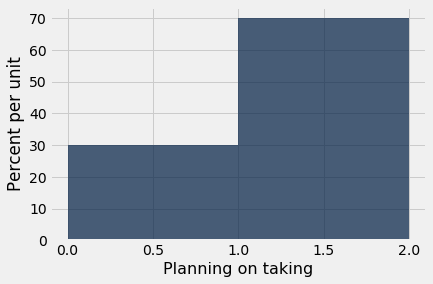

In [29]:
population = Table.read_table("population.csv")
population.hist("Planning on taking", bins=np.arange(0,3,1))
population.show(5)

**Question 2.1 ** Below is partially implemented code to run a simluation. The simulation will repeatedly take samples from the population and calculate the percentage of students who plan on taking the class. Fill in the missing parts. 

In [30]:
#def simulation(population, num_iterations, sample_size):
    #results = []
    #for i in np.arange(num_iterations):
        #sample = ...
        #percent_taking_class = 100*...
        #...
    #Table().with_column("Percent", results).hist("Percent", bins=np.arange(-0.05, 101, 100/sample_size))
def simulation(population, num_iterations, sample_size):
    results = []
    for i in np.arange(num_iterations):
        sample = population.sample(sample_size)
        percent_taking_class = sum(sample.column("Planning on taking"))/sample.num_rows*100
        results.append(percent_taking_class)
    Table().with_column("Percent", results).hist("Percent", bins=np.arange(-0.05, 101, 100/sample_size))

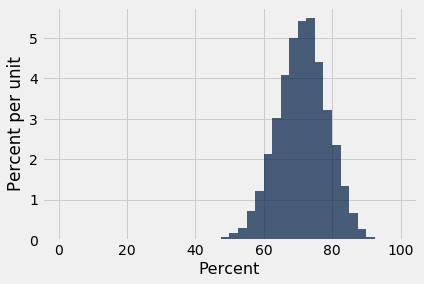

In [31]:
simulation(population, 10000, 40)

Does the distribution of the sample statistic look more like a normal curve or more like the population distribution? 

1. More like a normal curve.

2. More like the original population. 

In [32]:
#q2_1 = ...
q2_1 = 1
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The professor also tells us that as we increase the sample size, the standard deviation of our sample statistic distribution will decrease. Again we decide to run a simulation to double check. Run the following cell to see how the distribution of the sample statistic changes as we increase the size of our sample. **It might take a while to run.** 

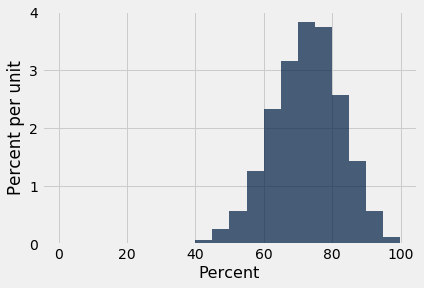

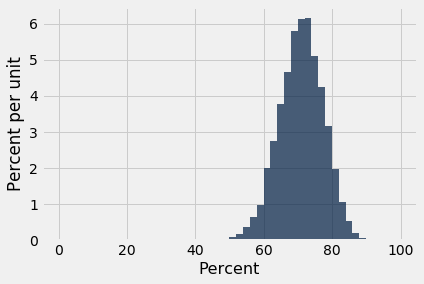

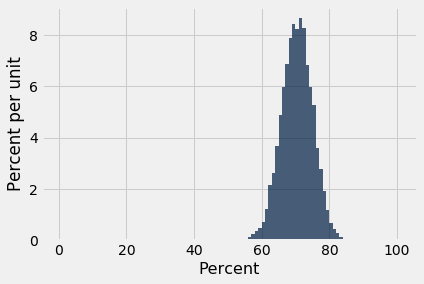

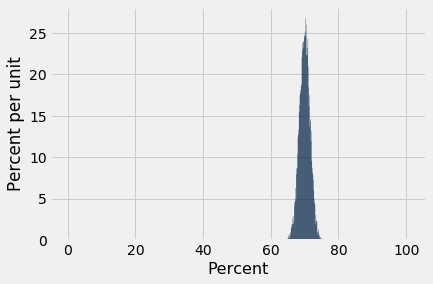

In [33]:
simulation(population, 10000, 20)
simulation(population, 10000, 50)
simulation(population, 10000, 100)
simulation(population, 10000, 850)

This trend can actually be expressed in a formula
$$ Sample \space Statistic \space SD = \frac{Population\space SD}{\sqrt{sample\space size}}$$

We can use this formula to find the sample size we need to get a desired standard deviation of the sample statistic and thus a certain confidence interval for that sample statistic. However, before taking our sample, we don't have any way of knowing the standard deviation of our population. The textbook and homework include some ways to get around this problem; here we will use the actual population standard deviation. 

** Question 2.2** The administration wants the confidence interval to have a width of 10 students, but we have been calculating the percentage of eligible students who are planning on taking the class. Let's calculate the confidence we would need to have as a percentage eligible students. From the number of students who are eligible to take the class, determine what percentage of that number equals 10 students.

In [34]:
#num_eligible_students = ...
#print(num_eligible_students)
#width_as_percent = ...
#print(width_as_percent)

num_eligible_students = population.num_rows
print(num_eligible_students)
width_as_percent = 10 / num_eligible_students
print(width_as_percent)

900
0.011111111111111112


In [35]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 2.3** Now let's calculate the sample standard deviation we would need for our 95% confidence interval to have a width of (your answer to q2_2). Remember that for a normal distribution, 95% of the data lies between plus and minus 2 SDs of the mean. Set the variable `target_sd` to equal the standard deviation we would need for our 95% confidence interval to have a width of (your answer to q2_2). 

In [36]:
#target_sd = ...
target_sd = width_as_percent / 4
target_sd

0.002777777777777778

In [37]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 2.4 ** We also need to calculate the standard deviation of the total population. Calculate this value and store it in the variable `population_sd`. 

In [38]:
# population_sd = ...
population_sd = np.std(population.column("Planning on taking"))
population_sd

0.45825756949558394

In [39]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.5** Now calculate the required sample size and store your result as `req_sample_size`. Recall that
$$ Sample \space Statistics \space SD = \frac{Population\space SD}{\sqrt{sample\space size}}$$

In [40]:
req_sample_size = (population_sd / target_sd)**2
req_sample_size

27215.999999999993

In [41]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.6** Our required sample size is bigger than our entire population. For each part, say whether it is `True` or `False`.

1. The administration will have to settle for a wider interval to get 95% confidence.
2. Sampling with replacement will be a feasible way to determine the information the administration needs.
3. The administration will have to settle for a lower degree of confidence to get an interval of width 10.
4. We should increase the size of the population until the sample size is smaller than the size of the population.

Set each variable below to either `True` or `False`.


In [42]:
#statement_1 = ...
#statement_2 = ...
#statement_3 = ...
#statement_4 = ...

statement_1 = True
statement_2 = False
statement_3 = True
statement_4 = False


In [43]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>